In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp # for reference

import autograd.numpy as np
from neuralsolver import NNSolver

# Problem Definition

In [2]:
# define ODE problem
# Lotka–Volterra equations

def f(t, y):
    # du/dt = au -buv
    # dv/dt = -cv + dbu*v
    # http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html
    a = 1.
    b = 0.1
    c = 1.5
    d = 0.75
    return [a*y[0] - b*y[0]*y[1], -c*y[1]+d*b*y[0]*y[1]]

t = np.linspace(0, 10, 100).reshape(-1, 1) #increase training points

y0_list = [5, 10] # number of prey and predactor respectively

# Reference solution

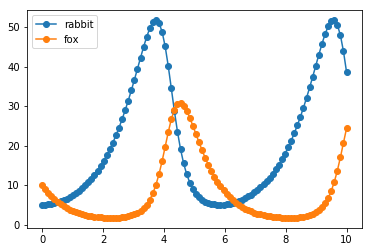

In [3]:
# reference solution using scipy package
sol = solve_ivp(f, [t.min(), t.max()], y0_list, 
                t_eval=t.ravel(), method='Radau', rtol=1e-5)
plt.plot(sol.t, sol.y[0], marker='o', label='rabbit')
plt.plot(sol.t, sol.y[1], marker='o', label='fox')
plt.legend()

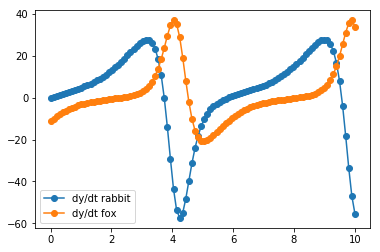

In [4]:
# reference solution using scipy package
plt.plot(sol.t, f(sol.t, sol.y)[0], marker='o', label='dy/dt rabbit')
plt.plot(sol.t, f(sol.t, sol.y)[1], marker='o', label='dy/dt fox')
plt.legend()

# Neural Net Training

In [5]:
nn = NNSolver(f, t, y0_list, n_hidden=20)
nn

Neural ODE Solver 
Number of equations:       2 
Initial condition y0:      [5, 10] 
Numnber of hidden units:   20 
Number of training points: 100 

In [6]:
nn.reset_weights()
%time nn.train(maxiter=1000, iprint=100)

iteration: 0 loss:  72.1701651702
iteration: 100 loss:  1.26718672075
iteration: 200 loss:  0.49248545966
iteration: 300 loss:  0.131290225136
iteration: 400 loss:  0.0502040170273
iteration: 500 loss:  0.0330959986291
iteration: 600 loss:  0.0265514357544
iteration: 700 loss:  0.0204231049641
iteration: 800 loss:  0.0149009244139
iteration: 900 loss:  0.00633600044481
         Current function value: 0.005076
         Iterations: 1000
         Function evaluations: 1098
         Gradient evaluations: 1098
CPU times: user 7.45 s, sys: 40.8 ms, total: 7.49 s
Wall time: 7.52 s


# Verifying training set

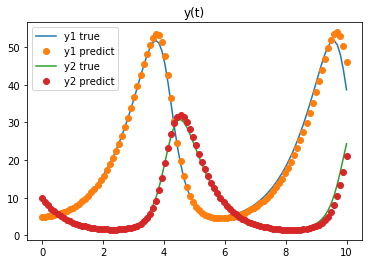

In [7]:
y_pred_list, dydt_pred_list = nn.predict()
# scipy sol
plt.plot(sol.t, sol.y[0], label='y1 true')
# nn soln
plt.plot(t, y_pred_list[0], 'o', label='y1 predict')

plt.plot(sol.t, sol.y[1], label='y2 true')
plt.plot(t, y_pred_list[1], 'o', label='y2 predict')

plt.legend()
plt.title('y(t)')

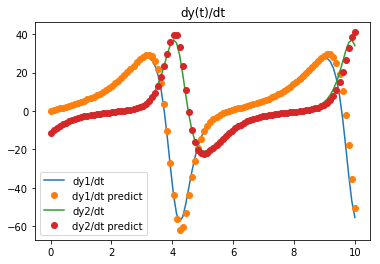

In [9]:
y_pred_list, dydt_pred_list = nn.predict()

plt.plot(sol.t, f(sol.t, sol.y)[0], label='dy1/dt')
plt.plot(t, dydt_pred_list[0], 'o', label='dy1/dt predict')

plt.plot(sol.t, f(sol.t, sol.y)[1], label='dy2/dt')
plt.plot(t, dydt_pred_list[1], 'o', label='dy2/dt predict')

plt.legend()
plt.title('dy(t)/dt')